In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import time
import os
import copy
import csv
import pandas as pd
from datetime import datetime

In [3]:
batch_size = 128 # Number of images processed at once
nb_classes = 10  # 10 Digits from 0 to 9

# Dimensionen of the input images (28x28 pixel)
img_rows, img_cols = 28, 28

# Load image data with labels, split into test and training set 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape images in 4D tensor (N images, 28 rows, 28 columns, 1 channel) 
# rescale pixels range from [0, 255] to [0, 1]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], "training samples")
print(X_test.shape[0], "test samples")

# convert digit labels (0-9) in one-hot encoded binary vectors. 
# These correspond to the training/test labels at the output of the net. 
Y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
Y_test = tf.keras.utils.to_categorical(y_test, nb_classes)
print("One-hot encoding: {}".format(Y_train[0, :]))

X_train shape:  (60000, 28, 28, 1)
60000 training samples
10000 test samples
One-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


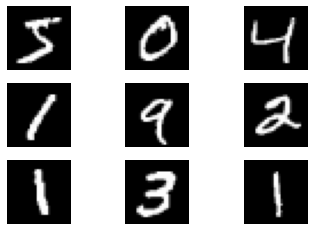

In [4]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(X_train[i, :, :, 0], cmap='gray')
    plt.axis('off')

In [5]:
model = tf.keras.Sequential()

# Conv2D(number_filters, kernel_size, input_shape=(number_channels, img_col), padding, activation)
model.add(tf.keras.layers.Conv2D(6, (5, 5), input_shape=[img_rows, img_cols, 1], padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, (5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(120, (5, 5), activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [6]:
opt = tf.keras.optimizers.SGD(learning_rate=1e-1)

In [8]:
training_round = 10

In [9]:
date = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')
check_point = tf.keras.callbacks.ModelCheckpoint(filepath="./data/26-10-2021/Train1/Keras/tf_lenet5-mnist_{}_{}.h5".format(date, training_round),
                                              monitor="val_acc",
                                              mode="max",
                                              save_best_only=True,
                                              )

In [10]:
#model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [11]:
nb_epoch = 50 # Number of passes over all pictures of the training set

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, 
          verbose=1, validation_data=(X_test, Y_test), callbacks=[check_point])

score =  model.evaluate(X_test, Y_test, verbose=0)
print('Test score', score[0])
print('Test accuracy', score[1])

Epoch 1/50
469/469 [==============================] - 7s 9ms/step - loss: 0.9955 - accuracy: 0.6639 - val_loss: 0.1065 - val_accuracy: 0.9647
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1500 - accuracy: 0.9565 - val_loss: 0.0671 - val_accuracy: 0.9791
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1040 - accuracy: 0.9688 - val_loss: 0.0439 - val_accuracy: 0.9862
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0871 - accuracy: 0.9747 - val_loss: 0.0405 - val_accuracy: 0.9870
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0720 - accuracy: 0.9796 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0597 - accuracy: 0.9827 - val_loss: 0.0345 - val_accuracy: 0.9891
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0550 - accuracy: 0.9841 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 

469/469 [==============================] - 3s 7ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0282 - val_accuracy: 0.9936
Epoch 39/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0348 - val_accuracy: 0.9924
Epoch 40/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0304 - val_accuracy: 0.9929
Epoch 41/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0348 - val_accuracy: 0.9925
Epoch 42/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0328 - val_accuracy: 0.9925
Epoch 43/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0328 - val_accuracy: 0.9930
Epoch 44/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0089 - accuracy: 0.9968 - val_loss: 0.0347 - val_accuracy: 0.9931
Epoch 45/50

In [12]:
date = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')
model.save("./data/26-10-2021/Train1/Keras/tf_Lenet5_mnist_{}_{}.h5".format(date, training_round))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 120)         48120     
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 120)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1080)              0

/store/travail/opmos/conda/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


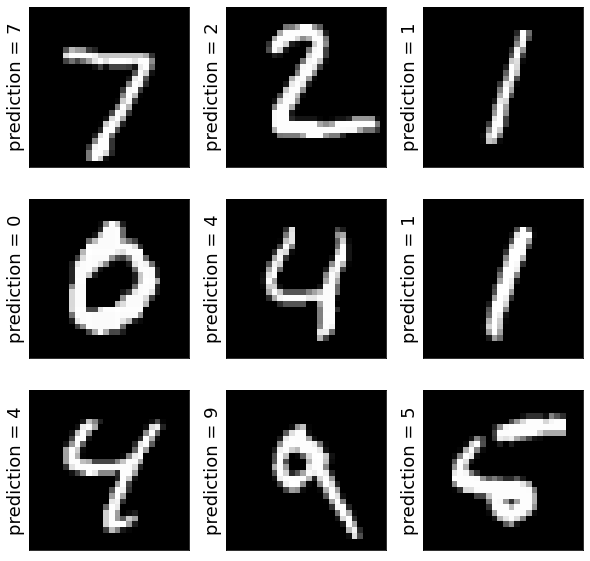

In [13]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = {}".format(res[i]), fontsize=18)

In [14]:
def export_history_csv(history_, model_name):
    since = time.time()
    date = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')
    data_file = open('./data/26-10-2021/Train1/Keras/tf_exp_train_{}_{}_{}.csv'.format(model_name, date, training_round), mode='w+', newline='', encoding='utf-8')
    data_writer = csv.writer(data_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    data_writer.writerow(['Model','type', 'Dataset', 'Epoch', 'criterion', 'optimizer', 'scheduler','Train_loss', 'Train_acc', "val_loss", "Val_acc", 'time','Elapse_time','date'])
    for epoch_ in history_.epoch:
        data_writer.writerow([history_.model,'tensorflow', 'hymenoptera', epoch_, '', 
                              history_.model.optimizer, '',history_.history['loss'][epoch_], history_.history['accuracy'][epoch_], 
                              history_.history['val_loss'][epoch_], history_.history['val_accuracy'][epoch_], '','',date])
    data_file.close()

In [15]:
model_name = 'Lenet5-mnist'
export_history_csv(history, model_name)